### An Overview of the Data and its Feature Description

The Mammographic Mass Data set from the UCI Machine Learning Repository comprises information on mammographic masses detected in patients. The data is structured with the following six columns, each providing specific attributes of the masses and patient information:

BI-RADS assessment: An ordinal value from 1 to 5, representing the radiologist's assessment of the likelihood of malignancy based on the BI-RADS scoring system, with higher scores indicating greater suspicion of cancer.

Age: An integer representing the age of the patient in years.

Shape: A nominal value indicating the shape of the mass, categorized as round (1), oval (2), lobular (3), or irregular (4).

Margin: A nominal value describing the edges of the mass, classified as circumscribed (1), microlobulated (2), obscured (3), ill-defined (4), or spiculated (5).

Density: An ordinal value reflecting the density of the mass on the mammogram, with categories of high (1), iso (2), low (3), or fat-containing (4).

Severity: A binomial value indicating whether the mass is benign (0) or malignant (1).

In [22]:
#Import Statements.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('mammographic_masses.data', delimiter=',')

In [3]:
df.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [ ]:
 Attribute Information:
   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)

In [4]:
#Assigning column names to the dataframe
df.columns = ["BI","Age","Shape","Margin",
"Density","Severity"]

In [5]:
df.head()

,BI,Age,Shape,Margin,Density,Severity
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [7]:
df.shape

(960, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BI        960 non-null    object
 1   Age       960 non-null    object
 2   Shape     960 non-null    object
 3   Margin    960 non-null    object
 4   Density   960 non-null    object
 5   Severity  960 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [13]:
# Function to check for the presence of a question mark in a row
def contains_question_mark(row):
    return row.astype(str).str.contains('\?').any()

# Apply the function to each row and count the rows containing '?'
count_rows_with_question_mark = df.apply(contains_question_mark, axis=1).sum()

# Display the result
print(f"Number of rows containing '?': {count_rows_with_question_mark}")

Number of rows containing '?': 131


In [16]:
# Function to check for the presence of a question mark in a row
def contains_question_mark(row):
    return row.astype(str).str.contains('\?').any()

# Apply the function to each row and get a boolean mask
mask = df.apply(contains_question_mark, axis=1)

# Filter out the rows containing '?'
df_cl = df[~mask]

In [17]:
df_cl.head()

,BI,Age,Shape,Margin,Density,Severity
1,5,58,4,5,3,1
2,4,28,1,1,3,0
7,5,57,1,5,3,1
9,5,76,1,4,3,1
10,3,42,2,1,3,1


In [20]:
pd.options.mode.chained_assignment = None

In [21]:
# List of columns to convert
columns_to_convert = ['BI', 'Age', 'Shape', 'Margin', 'Density']

# Convert the specified columns to integers
df_cl[columns_to_convert] = df_cl[columns_to_convert].astype(int)

In [19]:
df_cl.describe()

,BI,Age,Shape,Margin,Density,Severity
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,4.393245,55.768396,2.781665,2.810615,2.915561,0.484922
std,1.889394,14.675456,1.243088,1.566276,0.351136,0.500074
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [23]:
df['Severity'].value_counts()

Severity
0    516
1    444
Name: count, dtype: int64

In [24]:
# Dummy encode categorical variables
df_cl = pd.get_dummies(df_cl, drop_first=True)

In [25]:
# Define the y (target) variable
y = df_cl['Severity']

# Define the X (predictor) variables
X = df_cl.copy()
X = X.drop('Severity', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

In [37]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)
print(y_preds)

[1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1]


#### Model Prediction Evaluation 

In [27]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.817
Precision: 0.825
Recall: 0.792
F1 Score: 0.808


### Explaining the prediction values

Accuracy (0.817):

Accuracy is the proportion of correctly classified instances among the total instances in the test data. In this case, the GNB model achieved an accuracy of 0.817, indicating that it correctly predicted the severity (benign or malignant) for approximately 81.7% of the cases in the test data.

Precision (0.825):

Precision measures the proportion of true positive predictions (correctly predicted malignancies) among all instances predicted as positive (predicted as malignant). A precision of 0.825 suggests that out of all the instances predicted as malignant by the GNB model, about 82.5% were correctly classified as malignant.

Recall (0.792):

Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all actual positive instances. A recall of 0.792 indicates that the GNB model correctly identified about 79.2% of all actual malignant cases.

F1 Score (0.808):

The F1 Score is the harmonic mean of precision and recall, providing a balance between these two metrics. It's particularly useful when dealing with imbalanced datasets. An F1 Score of 0.808 implies that the GNB model achieved a good balance between precision and recall, considering both the correctness of positive predictions and the ability to capture actual positives.

Overall, these evaluation metrics suggest that the GNB model performed reasonably well in predicting mammographic mass severity, with a good balance between accuracy, precision, recall, and F1 Score. 
However, further analysis and potentially incorporating other evaluation metrics or techniques may provide additional insights into the model's performance.

In [28]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

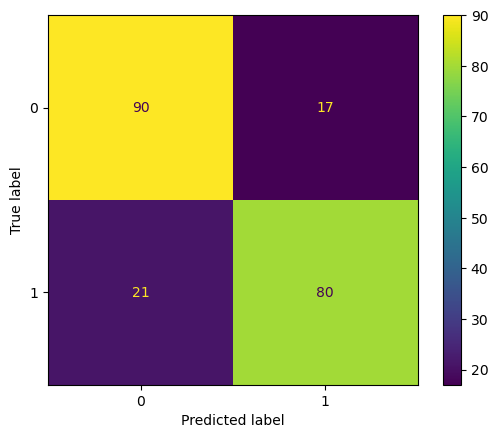

In [29]:
conf_matrix_plot(gnb, X_test, y_test)

#### In the context of a binary classification problem like predicting mammographic mass severity (benign or malignant), a confusion matrix provides a detailed breakdown of the model's predictions compared to the actual outcomes. Here's an explanation using the provided information:

##### True Negative (TN): 90

These are cases where the model correctly predicted a mass as benign (negative) and it was indeed benign.

##### False Negative (FN): 21

These are cases where the model incorrectly predicted a mass as benign (negative) but it was actually malignant (positive).

##### False Positive (FP): 17

These are cases where the model incorrectly predicted a mass as malignant (positive) but it was actually benign (negative).

##### True Positive (TP): 80

These are cases where the model correctly predicted a mass as malignant (positive) and it was indeed malignant.

### Seeing the performance of the data, let us see if there will be a better model outcome by scaling the data.

In [38]:
# Import the scaler function

from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler

scaler = MinMaxScaler()

# Fit the scaler to the training data

scaler.fit(X_train)

# Scale the training data

X_train = scaler.transform(X_train)

# Scale the test data

X_test = scaler.transform(X_test)

In [35]:
# Fit the model

gnb_scaled = GaussianNB()

gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data

scaled_preds = gnb_scaled.predict(X_test)

In [36]:
#Print the model evaluation metrices
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.817
Precision: 0.825
Recall: 0.792
F1 Score: 0.808


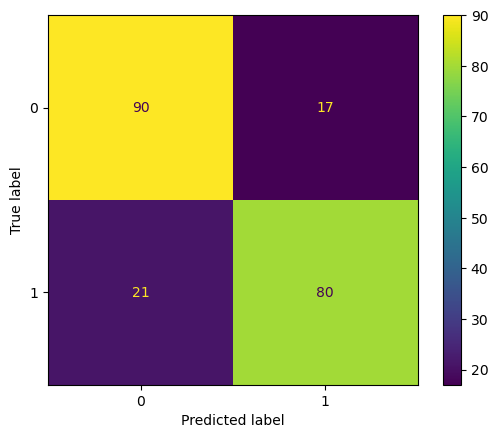

In [33]:
#Plot a confusion matrix
conf_matrix_plot(gnb_scaled, X_test, y_test)

Having scaled the data, fit it into the model, and printed the model evaluation metrics and the confusion matrix, we can see no difference in the model performance

##### Print and store in a data frame the train and test data

In [39]:
# Print the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Convert X_train and X_test back to pandas DataFrames for printing
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Print the head of the train and test sets (first 5 rows)
print("\nX_train head:")
print(X_train_df.head())

print("\nX_test head:")
print(X_test_df.head())



X_train shape: (621, 5)
y_train shape: (621,)
X_test shape: (208, 5)
y_test shape: (208,)

X_train head:
         BI       Age  Shape  Margin   Density
0  0.072727  0.217949    0.0    0.00  0.333333
1  0.054545  0.384615    1.0    0.75  0.666667
2  0.090909  0.615385    1.0    0.75  0.666667
3  0.090909  0.564103    1.0    0.75  0.666667
4  0.072727  0.410256    0.0    0.00  0.666667

X_test head:
         BI       Age     Shape  Margin   Density
0  0.090909  0.538462  1.000000    0.75  0.666667
1  0.090909  0.653846  1.000000    0.50  0.666667
2  0.090909  0.705128  1.000000    0.75  0.666667
3  0.072727  0.717949  0.333333    0.00  0.333333
4  0.072727  0.423077  0.000000    0.00  0.666667


#### Calculate and Print a Summarized Actual amd Predicted Benign and Malignant Patients

In [40]:
# Predict labels using the model on the test data
y_pred = gnb_scaled.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from the confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Store the results in a DataFrame
results_df = pd.DataFrame({
    'Actual': ['Benign (0)', 'Malignant (1)'],
    'Predicted as Benign (0)': [TN, FN],
    'Predicted as Malignant (1)': [FP, TP]
})

print(results_df)

          Actual  Predicted as Benign (0)  Predicted as Malignant (1)
0     Benign (0)                       90                          17
1  Malignant (1)                       21                          80


### Classifying the Malignant and Benign Patients into separate data frames

In [41]:
# Predict labels using the model on the test data
y_pred = gnb_scaled.predict(X_test)

# Convert X_test back to a pandas DataFrame for easier manipulation
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Add the predicted labels (y_pred) to X_test_df
X_test_df['Predicted_Severity'] = y_pred

# Filter rows where the predicted label is 1 (Malignant)
malignant_patients = X_test_df[X_test_df['Predicted_Severity'] == 1]

# Filter rows where the predicted label is 0 (Benign)
benign_patients = X_test_df[X_test_df['Predicted_Severity'] == 0]

# Print the patients classified as Malignant
print("Patients Classified as Malignant:")
print(malignant_patients)

# Print the patients classified as Benign
print("\nPatients Classified as Benign:")
print(benign_patients)

Patients Classified as Malignant:
           BI       Age  Shape  Margin   Density  Predicted_Severity
0    0.090909  0.538462    1.0    0.75  0.666667                   1
1    0.090909  0.653846    1.0    0.50  0.666667                   1
2    0.090909  0.705128    1.0    0.75  0.666667                   1
5    0.090909  0.846154    1.0    1.00  0.666667                   1
6    0.090909  0.628205    1.0    0.75  0.666667                   1
..        ...       ...    ...     ...       ...                 ...
202  0.072727  0.448718    1.0    1.00  0.666667                   1
204  0.072727  0.679487    1.0    1.00  0.333333                   1
205  0.090909  0.615385    1.0    0.75  0.666667                   1
206  0.000000  0.653846    1.0    1.00  0.666667                   1
207  0.072727  0.615385    1.0    0.75  0.666667                   1

[97 rows x 6 columns]

Patients Classified as Benign:
           BI       Age     Shape  Margin   Density  Predicted_Severity
3    0.0727

### Project Summary and Recommendation

#### Overall Performance

Accuracy: The Gaussian Naive Bayes (GNB) model achieved an accuracy of 81.7%, indicating that it correctly predicted mammographic mass severity (benign or malignant) for around 82 out of every 100 cases in the test data.

Precision: The precision of 82.5% suggests that when the model predicted a mass as malignant, it was correct approximately 83 times out of every 100 predictions. This indicates a high level of confidence in identifying true positives (malignant cases).

Recall: The recall, also known as sensitivity, was at 79.2%. This means that the model correctly identified around 79 out of every 100 actual malignant cases, showing its ability to capture positive instances effectively.

F1 Score: The F1 Score, which balances precision and recall, was calculated at 80.8%. This score indicates a good overall performance of the model, considering both its ability to correctly classify positive instances and its balance between precision and recall.

#### Recommendations for Non-Technical Stakeholders:

Model Reliability: The GNB model demonstrates a reliable performance in predicting mammographic mass severity, with an overall accuracy of 81.7%. Stakeholders can have confidence in its ability to classify cases correctly.

Focus on Malignancy Prediction: The model shows a high precision of 82.5%, indicating its strength in correctly identifying malignant cases when it predicts a mass as malignant. This is crucial for early detection and timely intervention.

Considerations for Improvement: While the model performs well overall, there may be opportunities to further enhance its performance, especially in terms of recall (79.2%). This could involve refining the feature selection process or exploring other machine learning algorithms for comparison.

Continued Monitoring: It's recommended to continuously monitor the model's performance and validate it against new data. Regular updates and improvements can help maintain its effectiveness over time.

Access and Read more about the data from https://archive.ics.uci.edu/dataset/161/mammographic+mass